In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Error: FileNotFoundError: The file '/content/online_gaming.csv' was not found.
# Please ensure the CSV file is uploaded to the Colab environment or the path is correct.
dataset=pd.read_csv('Breast_cancer.csv')
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


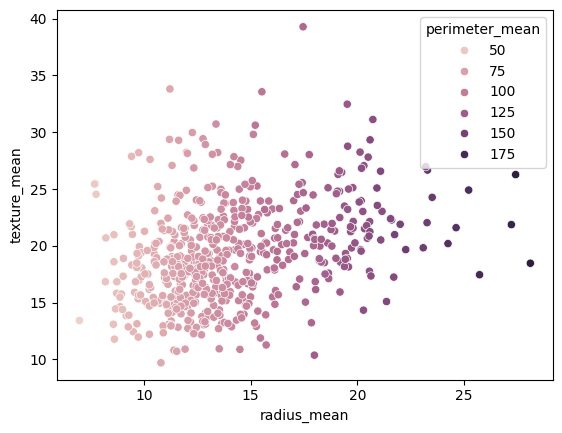

In [13]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=dataset, hue="perimeter_mean")
plt.show()

In [14]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

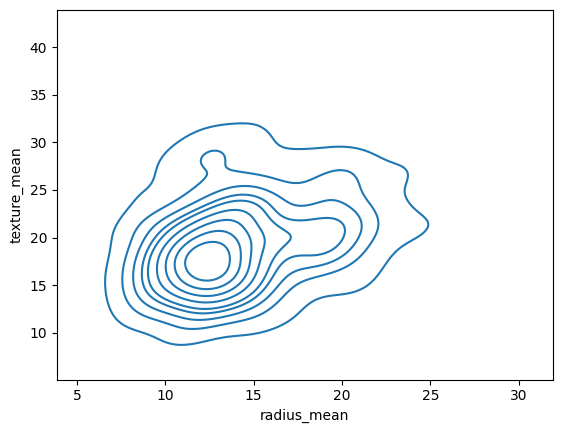

In [19]:
sns.kdeplot(x=x_train['radius_mean'], y=x_train['texture_mean'])
plt.show()

In [20]:
# The target variable `y` was incorrectly assigned to an empty column ('Unnamed: 32').
# For breast cancer prediction, the 'diagnosis' column is typically the target.
# Let's correct the assignment of `y`.
y = dataset['diagnosis']

# Also, it's good practice to drop the 'id' and 'Unnamed: 32' columns from `x`
# since 'id' is just an identifier and 'Unnamed: 32' is an empty column.
x = dataset.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

# Re-run train_test_split after correcting x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("First 5 rows of corrected y:")
display(y.head())
print("Shape of x_train after dropping columns:", x_train.shape)
print("Shape of y_train after correction:", y_train.shape)

First 5 rows of corrected y:


,diagnosis
0,M
1,M
2,M
3,M
4,M


Shape of x_train after dropping columns: (455, 30)
Shape of y_train after correction: (455,)


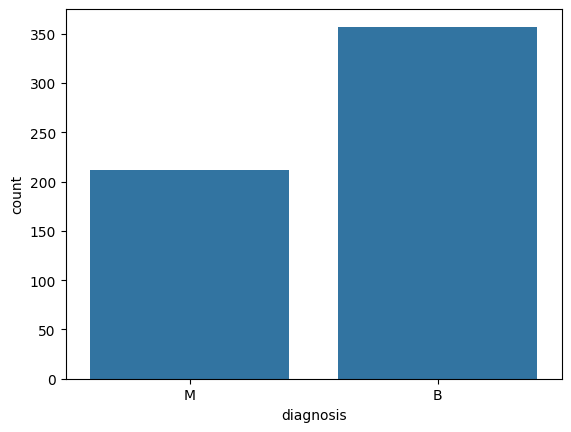

In [22]:
sns.countplot(x=dataset['diagnosis'])
plt.show()

In [23]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

Gaussian Naive Bayes Accuracy: 0.9736842105263158


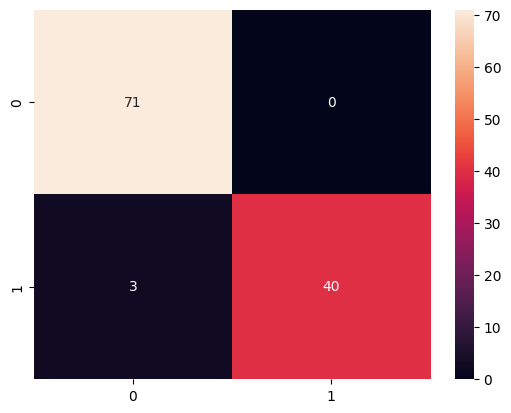

Multinomial Naive Bayes Accuracy: 0.9385964912280702


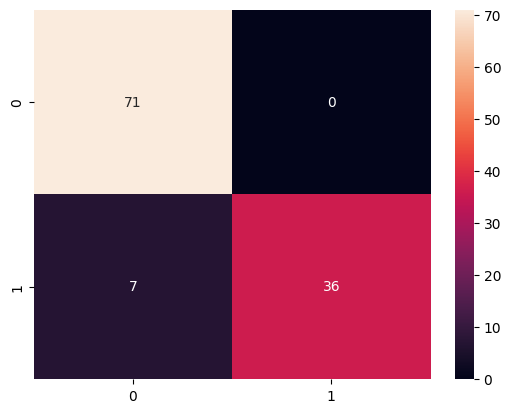

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


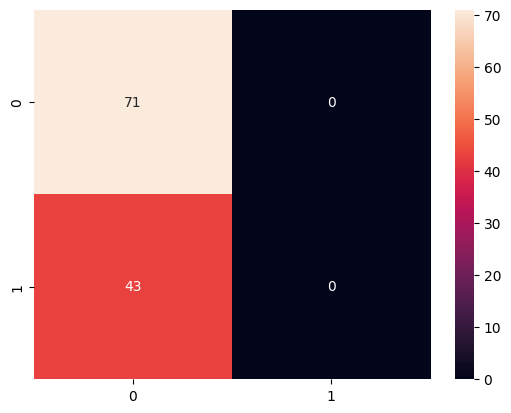

0.6228070175438597

In [42]:
gnb = GaussianNB()
gnb.fit(x_train, y_train_encoded)
gnb_pred = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test_encoded, gnb_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_acc)
gnb_cm = confusion_matrix(y_test_encoded, gnb_pred)
gnb_cr = classification_report(y_test_encoded, gnb_pred)
gnb.score(x_test, y_test_encoded)
gnb.score(x_train, y_train_encoded)
sns.heatmap(gnb_cm, annot=True, fmt='d')
plt.show()
mnb = MultinomialNB()
mnb.fit(x_train, y_train_encoded)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(y_test_encoded, mnb_pred)
print("Multinomial Naive Bayes Accuracy:", mnb_acc)
mnb_cm = confusion_matrix(y_test_encoded, mnb_pred)
mnb_cr = classification_report(y_test_encoded, mnb_pred)
mnb.score(x_test, y_test_encoded)
mnb.score(x_train, y_train_encoded)
sns.heatmap(mnb_cm, annot=True, fmt='d')
plt.show()
bnb = BernoulliNB()
bnb.fit(x_train, y_train_encoded)
bnb_pred = bnb.predict(x_test)
bnb_acc = accuracy_score(y_test_encoded, bnb_pred) # Corrected line
bnb.score(x_test, y_test_encoded)
bnb.score(x_train, y_train_encoded)
bnb_cm = confusion_matrix(y_test_encoded, bnb_pred)
bnb_cr = classification_report(y_test_encoded, bnb_pred)
bnb_acc = accuracy_score(y_test_encoded, bnb_pred)
bnb_cm
sns.heatmap(bnb_cm, annot=True, fmt='d')
plt.show()
bnb_acc

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


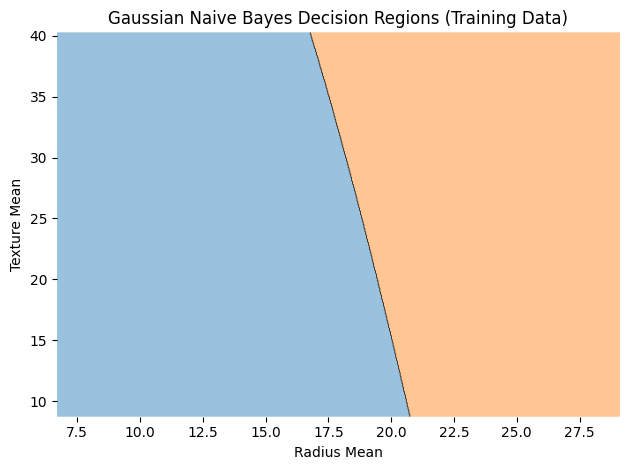

In [49]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode target labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Calculate mean for all features in x_train to use as filler values
mean_features = x_train.mean()

# Prepare filler_feature_values for the features not being plotted
# We are plotting feature_index 0 ('radius_mean') and 1 ('texture_mean')
filler_feature_values = {}
for i in range(x_train.shape[1]):
    if i not in [0, 1]:
        filler_feature_values[i] = mean_features.iloc[i]

# Now plot the decision regions with the encoded target variable
# Pass the full x_train.values and specify feature_index to indicate which two features to plot
plot_decision_regions(X=x_train.values, y=y_train_encoded, clf=gnb, legend=2, filler_feature_values=filler_feature_values, feature_index=[0, 1], scatter_kwargs={'s': 50, 'edgecolor': 'k'})

# Add plot title and labels for clarity
plt.title('Gaussian Naive Bayes Decision Regions (Training Data)')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')

plt.tight_layout()
plt.show()